In [7]:
import os
import numpy as np
from pathlib import Path
import pandas as pd
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import _pickle as c
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection

def save(clf,name):
    with open(name,'wb') as fp:
        c.dump(clf,fp)
    print('saved')

def make_dict():
    direc = "C://Users//Dushrath//Desktop//enron1//enron1//emails//"
    files = os.listdir(direc)

    emails = [direc + email for email in files]

    words =  []
    c = len(emails)
    for email in emails:
        f = open(email,encoding="latin-1")
        blob = f.read()
        words += blob.split(" ")

    for i in range(len(words)):
        if not words[i].isalpha():
            words[i] = ""
    dictionary = Counter(words)
    del dictionary[""]
    return dictionary.most_common(3000)

def make_dataset(dictionary):

    direc = "C://Users//Dushrath//Desktop//enron1//enron1//emails//"
    files = os.listdir(direc)

    emails = [direc + email for email in files]

    labels = []
    feature_set = []
    c = len(emails)
    for email in emails:
        data =  []
        f = open(email,encoding="latin-1")
        words = f.read().split(" ")
        for entry in dictionary:
            data.append(words.count(entry[0]))
        feature_set.append(data)
        if "ham" in email:
            labels.append(0)
        if "spam" in email:
            labels.append(1)
        print(c)
        c = c-1
    return feature_set,labels

d = make_dict()
features,labels = make_dataset(d)
print(len(features))
print(len(labels))

x_train,x_test,y_train,y_test = tts(features,labels,test_size = 0.2)

print("\n\n\n\n\n------- Executing Naive Bayes ---------\n\n ")
clf = MultinomialNB()
clf.fit(x_train,y_train)


preds = clf.predict(x_test)
print(accuracy_score(y_test,preds))
print(classification_report(y_test ,preds))
print(confusion_matrix(y_test,preds))

print("\n\n\n\n\n------- Executing Random Forest ---------\n\n ")
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train,y_train)
rfc_predict = rfc.predict(x_test)
print(rfc_predict,(y_test,rfc_predict))
print('Accuracy: ', accuracy_score(y_test,rfc_predict))
print(classification_report(y_test ,rfc_predict ))
print(confusion_matrix(y_test,rfc_predict))



print("\n\n\n\n\n------- Executing SVM ---------\n\n ")
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train,y_train)
y_pred = svclassifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

print("\n\n\n\n\n------- Executing SVM ---------\n\n ")
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train,y_train)
y_pred = svclassifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

print("\n\n\n\n\n------- Executing Confusion Matrix ---------\n\n ")
pred = clf.predict(x_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))


print(clf.predict(x_test))


pred = clf.predict(x_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))


save(clf,"text-classifer.mdl")




3074
3073
3072
3071
3070
3069
3068
3067
3066
3065
3064
3063
3062
3061
3060
3059
3058
3057
3056
3055
3054
3053
3052
3051
3050
3049
3048
3047
3046
3045
3044
3043
3042
3041
3040
3039
3038
3037
3036
3035
3034
3033
3032
3031
3030
3029
3028
3027
3026
3025
3024
3023
3022
3021
3020
3019
3018
3017
3016
3015
3014
3013
3012
3011
3010
3009
3008
3007
3006
3005
3004
3003
3002
3001
3000
2999
2998
2997
2996
2995
2994
2993
2992
2991
2990
2989
2988
2987
2986
2985
2984
2983
2982
2981
2980
2979
2978
2977
2976
2975
2974
2973
2972
2971
2970
2969
2968
2967
2966
2965
2964
2963
2962
2961
2960
2959
2958
2957
2956
2955
2954
2953
2952
2951
2950
2949
2948
2947
2946
2945
2944
2943
2942
2941
2940
2939
2938
2937
2936
2935
2934
2933
2932
2931
2930
2929
2928
2927
2926
2925
2924
2923
2922
2921
2920
2919
2918
2917
2916
2915
2914
2913
2912
2911
2910
2909
2908
2907
2906
2905
2904
2903
2902
2901
2900
2899
2898
2897
2896
2895
2894
2893
2892
2891
2890
2889
2888
2887
2886
2885
2884
2883
2882
2881
2880
2879
2878
2877
2876
2875


In [8]:
print("\n\n\n\n\n------- Executing SVM ---------\n\n ")
svclassifier = SVC(kernel='poly',degree=8)
svclassifier.fit(x_train,y_train)
y_pred = svclassifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))






------- Executing SVM ---------

 
[[725   3]
 [287  20]]
Accuracy:  0.7198067632850241
              precision    recall  f1-score   support

           0       0.72      1.00      0.83       728
           1       0.87      0.07      0.12       307

    accuracy                           0.72      1035
   macro avg       0.79      0.53      0.48      1035
weighted avg       0.76      0.72      0.62      1035



In [9]:
print("\n\n\n\n\n------- Executing SVM ---------\n\n ")
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train,y_train)
y_pred = svclassifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))






------- Executing SVM ---------

 
[[719   9]
 [162 145]]
Accuracy:  0.8347826086956521
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       728
           1       0.94      0.47      0.63       307

    accuracy                           0.83      1035
   macro avg       0.88      0.73      0.76      1035
weighted avg       0.85      0.83      0.82      1035



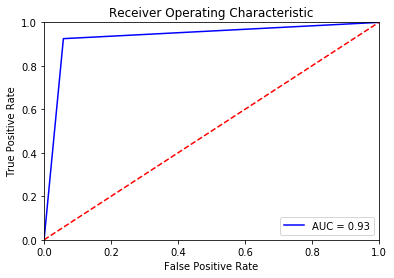

SVM


In [10]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("SVM")

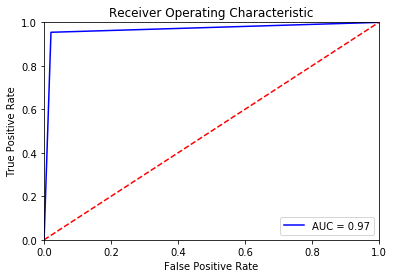

Random Forest


In [11]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, rfc_predict)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Random Forest")

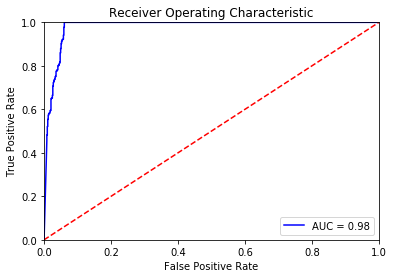

Naive Bayes


In [12]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Naive Bayes")